In [1]:
import pandas as pd
import numpy as np

In [2]:
approved_mission = pd.read_csv('Approved Missions.csv')

In [3]:
df = approved_mission['player_id'].value_counts().reset_index()

In [4]:
df

,index,player_id
0,47554,5592
1,35911,5548
2,41968,5081
3,50188,4170
4,39791,3904
5,37862,2814
6,41150,2792
7,46048,2656
8,48422,2582
9,37741,2580


In [5]:
dic = {}
for _, row in df.iterrows():
    if row[0] not in dic:
        dic[row[0]] = row[1]

In [6]:
# Similarly create another variable with Total Earned Coined in 30 dayes
sumdf = approved_mission.groupby(['player_id'])['coins_earned'].sum().reset_index()
sumdf_dic = {}
for _, row in sumdf.iterrows():
    if row[0] not in sumdf_dic:
        sumdf_dic[row[0]] = row[1]

In [7]:
demo_data = pd.read_csv('Player Details - SR.csv')
demo_data.head()

,Player Id,Earnings (INR),quality_score,city,state,Ref Source,is_banned,lives,gender,Date Joined
0,35911,153409,1.836809,Delhi,DL,Unknown,False,5,male,2016-01-31 17:41:25+00:00
1,12938,136950,1.669829,NaN,NaN,Friend,False,5,male,2015-04-12 11:58:45+00:00
2,41968,123542,1.776255,Mundka,DL,Unknown,False,5,male,2016-04-11 19:52:35+00:00
3,37741,102428,1.181557,Kolkata,WB,Unknown,False,5,female,2016-02-24 22:12:27+00:00
4,19547,95286,1.793723,NaN,NaN,Unknown,False,5,male,2015-04-22 08:41:04+00:00


In [8]:
demo_data.shape

(54610, 10)

In [9]:
len(pd.unique(demo_data['Player Id'])) # So no duplicated rows.

54610

In [10]:
# Create a complete data frames
demo_data['Number_ofApprovedMissions'] = demo_data['Player Id'].map(lambda x: dic[x] if x in dic.keys() else 0)
demo_data['TotalEarndCoined'] = demo_data['Player Id'].map(lambda x: sumdf_dic[x] if x in dic.keys() else 0)

In [11]:
demo_data.head()

,Player Id,Earnings (INR),quality_score,city,state,Ref Source,is_banned,lives,gender,Date Joined,Number_ofApprovedMissions,TotalEarndCoined
0,35911,153409,1.836809,Delhi,DL,Unknown,False,5,male,2016-01-31 17:41:25+00:00,5548,2441410
1,12938,136950,1.669829,NaN,NaN,Friend,False,5,male,2015-04-12 11:58:45+00:00,1827,739760
2,41968,123542,1.776255,Mundka,DL,Unknown,False,5,male,2016-04-11 19:52:35+00:00,5081,2131930
3,37741,102428,1.181557,Kolkata,WB,Unknown,False,5,female,2016-02-24 22:12:27+00:00,2580,925515
4,19547,95286,1.793723,NaN,NaN,Unknown,False,5,male,2015-04-22 08:41:04+00:00,1945,871530


In [12]:
# Answer following questions:
# 1) Are there any player id which have lower number of Approved missions with High Earnings and quality Score
# 2) Find player id which have Maximum number of Approval but still have low quality score
# 3) Find players which has total earned coins are high but have lower Earnings(belongs lower earned coined groups)
# 4) create different segments
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [14]:
demo_data.sort_values(ascending=False, by="Earnings (INR)").head(20)

,Player Id,Earnings (INR),quality_score,city,state,Ref Source,is_banned,lives,gender,Date Joined,Number_ofApprovedMissions,TotalEarndCoined
0,35911,153409,1.836809,Delhi,DL,Unknown,False,5,male,2016-01-31 17:41:25+00:00,5548,2441410
1,12938,136950,1.669829,NaN,NaN,Friend,False,5,male,2015-04-12 11:58:45+00:00,1827,739760
2,41968,123542,1.776255,Mundka,DL,Unknown,False,5,male,2016-04-11 19:52:35+00:00,5081,2131930
3,37741,102428,1.181557,Kolkata,WB,Unknown,False,5,female,2016-02-24 22:12:27+00:00,2580,925515
4,19547,95286,1.793723,NaN,NaN,Unknown,False,5,male,2015-04-22 08:41:04+00:00,1945,871530
5,30161,81333,1.577203,Hyderabad,TG,Unknown,False,5,female,2015-10-28 09:43:22+00:00,2083,557418
6,50188,79537,1.802861,NaN,NaN,Friend,False,5,male,2016-07-20 17:10:32+00:00,4170,1889825
7,31188,77936,1.747294,Hatia,JH,Unknown,False,5,male,2015-11-20 22:18:26+00:00,658,260630
8,44666,75366,1.728857,Anand,GJ,Friend,False,5,male,2016-05-16 19:44:50+00:00,1904,795020
9,37389,75281,1.275370,NaN,NaN,Unknown,False,5,female,2016-02-20 07:33:08+00:00,1037,656105


As we can see, accounts 30161 has high earnings but it has low qwality score.And 50188 has high quality score and but low earnings. 

In [15]:
newdf = demo_data.sort_values(ascending=False, by="Earnings (INR)").head(20)
newdf.shape

(20, 12)

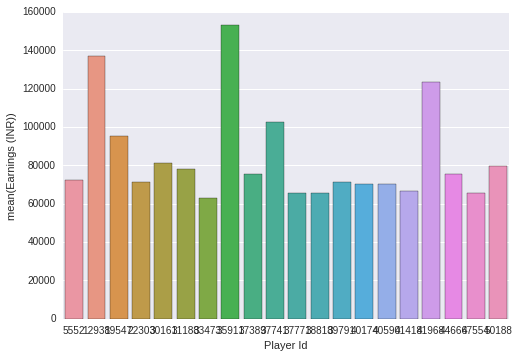

In [16]:
# Let's look at trends according to Earnings
import seaborn as sns
ax = sns.barplot(x="Player Id", y="Earnings (INR)", data=newdf)
ax

In [17]:
# Lets build K-Means clustering algorithms for segmentation
demo_data.columns

Index(['Player Id', 'Earnings (INR)', 'quality_score', 'city', 'state',
       'Ref Source', 'is_banned', 'lives', 'gender', 'Date Joined',
       'Number_ofApprovedMissions', 'TotalEarndCoined'],
      dtype='object')

In [18]:
print(demo_data['is_banned'].value_counts())
print(demo_data['gender'].value_counts())
print(demo_data['city'].value_counts())
print(demo_data['Ref Source'].value_counts())
print(demo_data['lives'].value_counts())

False    54610
Name: is_banned, dtype: int64
male      44352
female    10258
Name: gender, dtype: int64
Delhi             1847
Mumbai            1818
Bengaluru         1270
Hyderabad          943
Kolkata            508
Chennai            473
New Delhi          399
Noida              370
Jaipur             353
Pune               350
Thane              269
Gurgaon            263
Bhopal             172
Ghaziabad          150
Chandigarh         141
Lucknow            140
Ahmedabad          128
Allahabad          112
Indore             108
Faridabad          100
Jalalpur            98
Nagar               97
Bhubaneswar         86
Patna               78
Ajmer               73
Bhavnagar           72
Siuri               66
Mohali              65
Jabalpur            61
Visakhapatnam       60
                  ... 
Kotdwara             1
Dharmaram            1
Bodinayakkanur       1
Long Beach           1
Kusugal              1
Vashi                1
Nuvem                1
Kutiatodu            1

Lets use following columns for clustering:

'Player Id', 'Earnings (INR)', 'quality_score', 'Ref Source','gender',
       'Number_ofApprovedMissions', 'TotalEarndCoined'

In [19]:
def ref_source(col):
    if col == 'Unknown':
        return 'Unknown'
    elif col == 'Friend':
        return 'Friend'
    else: return 'others'

In [20]:
demo_data['Newgender'] = demo_data['gender'].map(lambda x: 1 if x=='male' else 0)
demo_data['RefSource'] = demo_data['Ref Source'].map(ref_source)

In [21]:
demo_data.columns

Index(['Player Id', 'Earnings (INR)', 'quality_score', 'city', 'state',
       'Ref Source', 'is_banned', 'lives', 'gender', 'Date Joined',
       'Number_ofApprovedMissions', 'TotalEarndCoined', 'Newgender',
       'RefSource'],
      dtype='object')

In [22]:
columns = ['Player Id', 'Earnings (INR)', 'quality_score', 'Number_ofApprovedMissions', 'TotalEarndCoined']

In [23]:
final_data = demo_data[columns]

In [24]:
final_data.head()

,Player Id,Earnings (INR),quality_score,Number_ofApprovedMissions,TotalEarndCoined
0,35911,153409,1.836809,5548,2441410
1,12938,136950,1.669829,1827,739760
2,41968,123542,1.776255,5081,2131930
3,37741,102428,1.181557,2580,925515
4,19547,95286,1.793723,1945,871530


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test = train_test_split(final_data, test_size=0.33, random_state=42)

In [27]:
def pre_process(df):
    mean = df[df.columns[1:]].mean()
    std = df[df.columns[1:]].std()
    df[df.columns[1:]] = (df[df.columns[1:]] - mean)/std
    return df

In [28]:
train_index = X_train['Player Id']
# mean = X_train[X_train.columns[1:]].mean()
# std = X_train[X_train.columns[1:]].std()
# X_train[X_train.columns[1:]] = (X_train[X_train.columns[1:]] - mean)/std

In [29]:
from sklearn.cluster import KMeans

In [30]:
X_train = pre_process(X_train)
X_test = pre_process(X_test)

/usr/lib64/python3.4/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [31]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

/usr/lib64/python3.4/site-packages/pandas/core/frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [32]:
print(X_train.head())
print(X_test.head())

       Player Id  Earnings (INR)  quality_score  Number_ofApprovedMissions  \
47443      20360       -0.112977       0.354570                   -0.08100   
32185      14674       -0.111134      -0.567810                   -0.08100   
1203       45185        0.799999       1.529173                    0.11793   
47212      51114       -0.112977       0.354570                   -0.08100   
47249      24934       -0.112977       0.354570                   -0.08100   

       TotalEarndCoined  
47443         -0.073592  
32185         -0.073592  
1203           0.112735  
47212         -0.073592  
47249         -0.073592  
       Player Id  Earnings (INR)  quality_score  Number_ofApprovedMissions  \
7530       20766       -0.104379       0.031234                   -0.09122   
8781       57285       -0.107747      -0.056499                   -0.09122   
39192      25434       -0.115604      -1.043488                   -0.09122   
8546       20814       -0.107373       0.733093                

In [39]:
number_of_clusters = [4,5,6,7,8,9,10,11,12,13,14]

In [52]:
from sklearn.metrics import silhouette_score
for clusters in number_of_clusters:
    model = KMeans( n_clusters=clusters, init='k-means++', n_init=2, max_iter=3000, random_state=1234)
    model.fit(X_train[X_train.columns[1:]])
    train_lable = model.predict(X_train[X_train.columns[1:]])
    labels = model.predict(X_test[X_test.columns[1:]])
    print(clusters, labels[0:10])
    score = silhouette_score(X_test[X_test.columns[1:]].values, labels, metric='euclidean',random_state=123)
    print(score)

4 [1 1 0 1 1 0 1 0 1 1]
0.598453047825
5 [0 0 2 0 0 2 0 2 0 0]
0.619160843761
6 [4 4 1 4 4 1 4 1 4 4]
0.629374263162
7 [0 0 2 0 0 2 0 0 0 6]
0.567616433235
8 [0 0 2 0 0 2 0 2 0 0]
0.633799573339
9 [5 5 0 5 5 0 5 0 5 5]
0.636508358146
10 [8 0 7 8 8 7 8 0 8 8]
0.67126843435
11 [ 0 10  2  0  0  2  0 10  0  0]
0.673507554205
12 [ 0 10  2  0  0  2  0 10  0  0]
0.673979251037
13 [ 0 10  2  0  0  2  0 10  0  0]
0.676772365635
14 [ 0 10  2  0  0  2  0 10  0  0]
0.676772365635


## Looking at silhoute score, which basically explains the inter and intra distance of a point from one cluster to other is maximum for the 10. So we shold segment our data into 10 clusters.

Below i have done dimensional reduction using PCA Algorithm. Although there are some outliers in the data. which are primarly dominating in clustering Algorithm. May be during Segmentation we should neglect those data points and then we can again K-Means Algorithm and automatically it will do the segmentation and we can verify whether our clusters are good or bad based on Silhoutte Score.

4 [1 1 0 1 1 0 1 0 1 1]


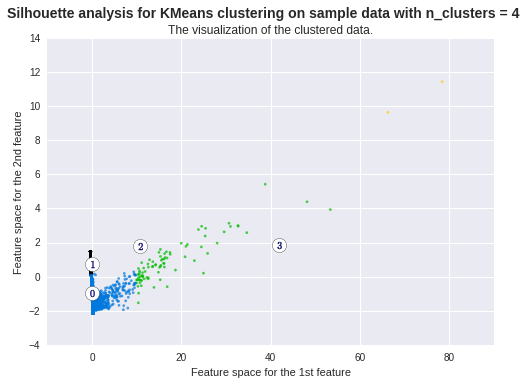

5 [0 0 2 0 0 2 0 2 0 0]


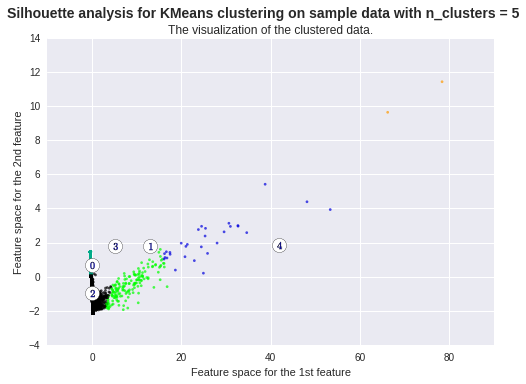

6 [4 4 1 4 4 1 4 1 4 4]


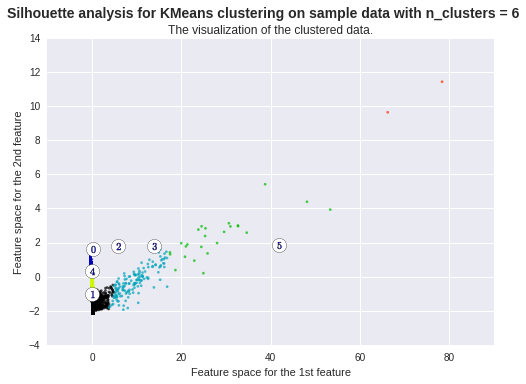

7 [0 0 2 0 0 2 0 0 0 6]


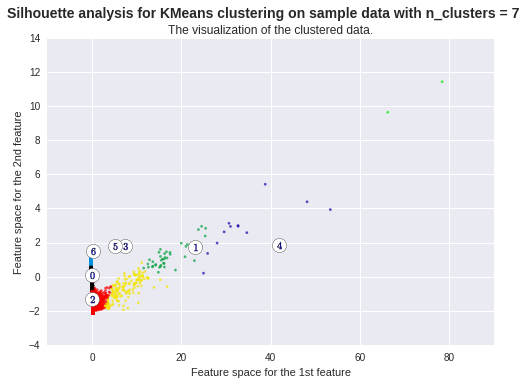

8 [0 0 2 0 0 2 0 2 0 0]


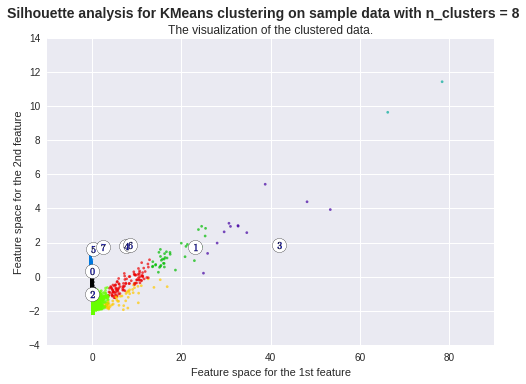

9 [5 5 0 5 5 0 5 0 5 5]


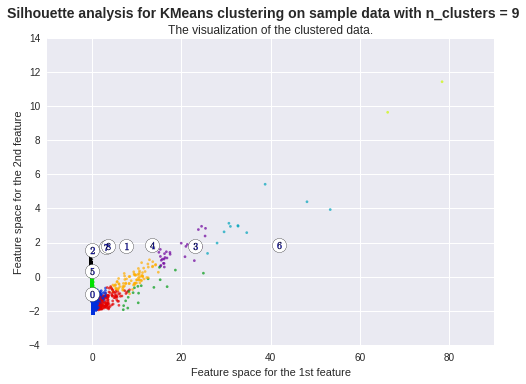

10 [8 0 7 8 8 7 8 0 8 8]


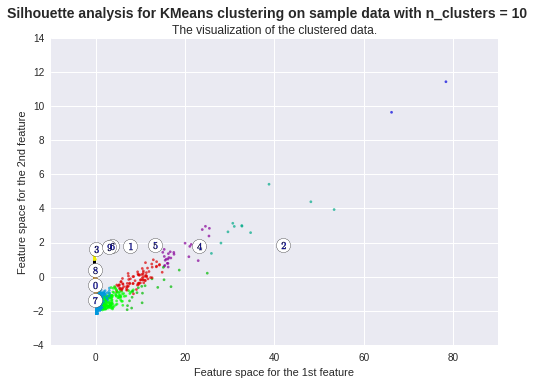

11 [ 0 10  2  0  0  2  0 10  0  0]


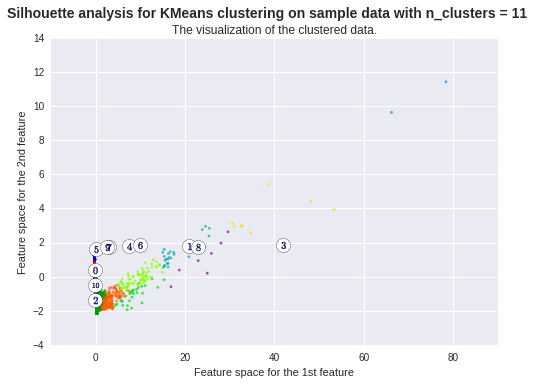

12 [ 0 10  2  0  0  2  0 10  0  0]


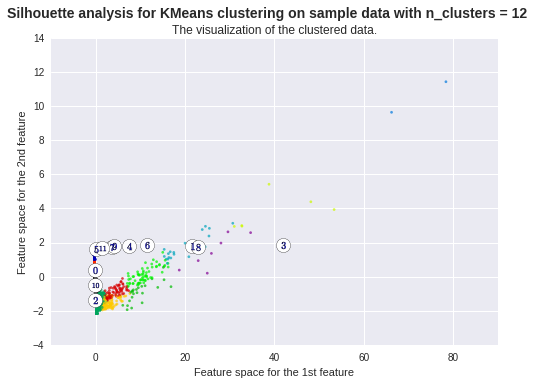

13 [ 0 10  2  0  0  2  0 10  0  0]


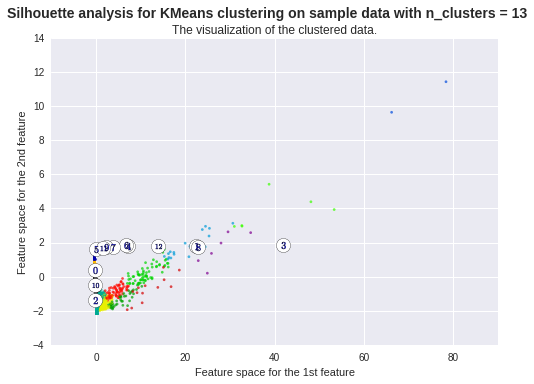

14 [ 0 10  2  0  0  2  0 10  0  0]


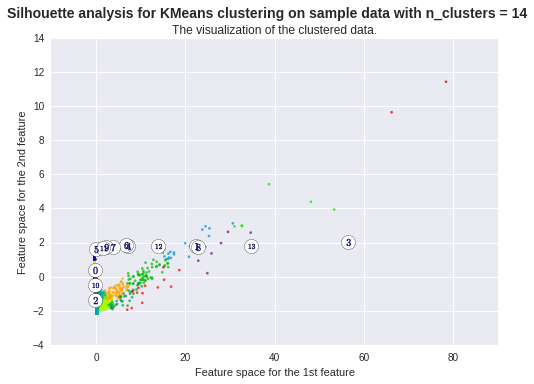

In [51]:
for n_clusters in number_of_clusters:
    # Create a subplot with 1 row and 2 columns
#     figure = plt.figure()
#     ax2 = figure
    fig, ax2 = plt.subplots(1, 1)
#     ax2 = plt.plot()
#     fig.set_size_inches(18, 7)
    
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=2, max_iter=3000, random_state=1234)
    clusterer.fit(X_train[X_train.columns[1:]])
    train_lable = clusterer.predict(X_train[X_train.columns[1:]])
    cluster_labels = clusterer.predict(X_test[X_test.columns[1:]])
    print(n_clusters, cluster_labels[0:10])
    score = silhouette_score(X_test[X_test.columns[1:]].values, cluster_labels, metric='euclidean',random_state=123)
    
    # Applying PCA
    pca = PCA(n_components=2)
    new_Xtrain = pca.fit(X_train[X_train.columns[1:]])
    newX_test = pca.transform(X_test[X_test.columns[1:]])
    
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(newX_test[:, 0], newX_test[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()